#Домашнее задание №1
---
### Решение задачи кластеризации
### По курсу: Специальные главы математики


## Общая постановка задачи:
Из множества элементов X= {x_1, x_2,…x_i,…x_m  } , каждый из которых характеризуется набором признаков D= {d_1, d_2,…d_j,…d_n  } , выделить совокупность подмножеств (кластеров) C= {c_1, c_2,…c_q,…c_p  } в соответствии с критерием сходства элементов S_ik

## Формальная постановка задачи:
X – пространство объектов, представляющее различные страны;
X^l=〖{x_i}〗_(i=1)^l\ – обучающая выборка, включающая выборку стран с различными характеристиками (l=545);
ρ∶X ×X →[0;∞) \– функция расстояния между странами, определяющая степень сходства на основе заданных показателей.

### Задача:
Из множества стран X = {x₁, x₂, ..., xₘ}, каждая из которых характеризуется набором социально-экономических показателей D = {d₁, d₂, ..., dₙ} (таких как уровень образования, уровень коррупции, уровень преступности и др.), разработать систему кластеризации стран C = {c₁, c₂, ..., cₚ} на основе их характеристик для автоматического группирования стран по схожим социально-экономическим свойствам Sᵢₖ.

### Дано:
X – пространство объектов: страны.
Xˡ – обучающая выборка: данные о странах из датасета (l = 545).
ρ: X × X → [0; ∞) – функция расстояния между объектами (евклидово расстояние).

### Найти:
C – множество кластеров.
a: X → C – алгоритм кластеризации (MACS), такой что:
1. Каждый кластер состоит из близких по показателям стран (страны в одном кластере имеют схожие социально-экономические характеристики);
2. Объекты разных кластеров существенно различаются (например, страны могут быть разделены на группы с высоким, средним и низким уровнем жизни).

### Цель:
Определить ключевые социально-экономические показатели, наиболее сильно влияющие на уровень жизни, и разделить страны на заранее заданное количество кластеров. Результаты кластеризации можно использовать для анализа уровня жизни в разных группах стран, разработки стратегий улучшения социально-экономических условий и формирования рекомендаций для правительств и международных организаций.

### Объект исследования:
Страны, представленные в датасете https://www.kaggle.com/datasets/khushikyad001/world-happiness-report


Для корректной работы ноутбука, необходимо установить библиотеку kneed, так как она не установлена в среде Google Colab.

In [ ]:
!pip install kneed

## Импорт необходимых библиотек
1. StandardScaler для нормализации данных
2. PCA для уменьшения размерности
3. KneeLocator для автоматического определения числа кластеров

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from itertools import combinations
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from google.colab import drive

## Загрузка данных из csv-файла:

In [ ]:
# Загрузка файла из гугл диска
drive.mount('/content/drive')
path = '/content/drive/MyDrive/world_happiness_report.csv'
df = pd.read_csv(path)


Mounted at /content/drive


In [ ]:
# Просмотр загруженного файла
df.head()

,Country,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,...,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate
0,China,2022,4.39,44984.68,0.53,71.11,0.41,-0.05,0.83,14.98,...,0.34,76.44,46.06,8.92,62.75,8.59,74.40,70.30,0.29,61.38
1,UK,2015,5.49,30814.59,0.93,63.14,0.89,0.04,0.84,19.46,...,0.72,53.38,46.43,4.43,53.11,8.76,91.74,73.32,0.76,80.18
2,Brazil,2009,4.65,39214.84,0.03,62.36,0.01,0.16,0.59,16.68,...,0.23,82.40,31.03,3.78,33.30,6.06,71.80,28.99,0.94,72.65
3,France,2019,5.20,30655.75,0.77,78.94,0.98,0.25,0.63,2.64,...,0.68,46.87,57.65,4.43,90.59,6.36,86.16,45.76,0.48,55.14
4,China,2022,7.28,30016.87,0.05,50.33,0.62,0.18,0.92,7.70,...,0.50,60.38,28.54,7.66,59.33,3.00,71.10,65.67,0.12,51.55


## Анализ Датасета
### Просмотр типов данных

In [ ]:
i = 1
for col, dtype in df.dtypes.items():
    print(f"{i} {col}: {dtype}")
    i += 1

1 Country: object
2 Year: int64
3 Happiness_Score: float64
4 GDP_per_Capita: float64
5 Social_Support: float64
6 Healthy_Life_Expectancy: float64
7 Freedom: float64
8 Generosity: float64
9 Corruption_Perception: float64
10 Unemployment_Rate: float64
11 Education_Index: float64
12 Population: int64
13 Urbanization_Rate: float64
14 Life_Satisfaction: float64
15 Public_Trust: float64
16 Mental_Health_Index: float64
17 Income_Inequality: float64
18 Public_Health_Expenditure: float64
19 Climate_Index: float64
20 Work_Life_Balance: float64
21 Internet_Access: float64
22 Crime_Rate: float64
23 Political_Stability: float64
24 Employment_Rate: float64


### Выбор признаков для кластеризации

In [ ]:
# Выбор признаков для кластеризации
numeric_features = ['Happiness_Score', 'GDP_per_Capita', 'Social_Support',
                   'Healthy_Life_Expectancy', 'Freedom', 'Generosity',
                   'Corruption_Perception', 'Unemployment_Rate', 'Education_Index',
                   'Population', 'Urbanization_Rate', 'Life_Satisfaction',
                   'Public_Trust', 'Mental_Health_Index', 'Income_Inequality',
                   'Public_Health_Expenditure', 'Climate_Index', 'Work_Life_Balance',
                   'Internet_Access', 'Crime_Rate', 'Political_Stability', 'Employment_Rate']
#Оставляем только количественные признаки

### Проверка пропущенных значений:

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    4000 non-null   object 
 1   Year                       4000 non-null   int64  
 2   Happiness_Score            4000 non-null   float64
 3   GDP_per_Capita             4000 non-null   float64
 4   Social_Support             4000 non-null   float64
 5   Healthy_Life_Expectancy    4000 non-null   float64
 6   Freedom                    4000 non-null   float64
 7   Generosity                 4000 non-null   float64
 8   Corruption_Perception      4000 non-null   float64
 9   Unemployment_Rate          4000 non-null   float64
 10  Education_Index            4000 non-null   float64
 11  Population                 4000 non-null   int64  
 12  Urbanization_Rate          4000 non-null   float64
 13  Life_Satisfaction          4000 non-null   float

#### Пропущенные значения отсутствуют

### Проверка наличия дубликатов

In [ ]:
# Проверка наличия дубликатов
num_duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")
df = df.drop_duplicates()

Количество дубликатов: 0


#### Дубликатов нет

### Описательная статистика

In [ ]:
print("\nОписательная статистика:")
print(df[numeric_features].describe())


Описательная статистика:
       Happiness_Score  GDP_per_Capita  Social_Support  \
count      4000.000000     4000.000000     4000.000000   
mean          5.455005    30482.009953        0.505860   
std           1.427370    17216.122032        0.286202   
min           3.000000     1009.310000        0.000000   
25%           4.237500    15425.125000        0.260000   
50%           5.430000    29991.255000        0.510000   
75%           6.662500    45763.085000        0.750000   
max           8.000000    59980.720000        1.000000   

       Healthy_Life_Expectancy      Freedom   Generosity  \
count              4000.000000  4000.000000  4000.000000   
mean                 67.917605     0.502723     0.143960   
std                  10.172091     0.285219     0.200088   
min                  50.000000     0.000000    -0.200000   
25%                  59.177500     0.260000    -0.030000   
50%                  68.015000     0.500000     0.140000   
75%                  76.690000 

### Стандартизация данных

In [ ]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

### Матрица корреляции

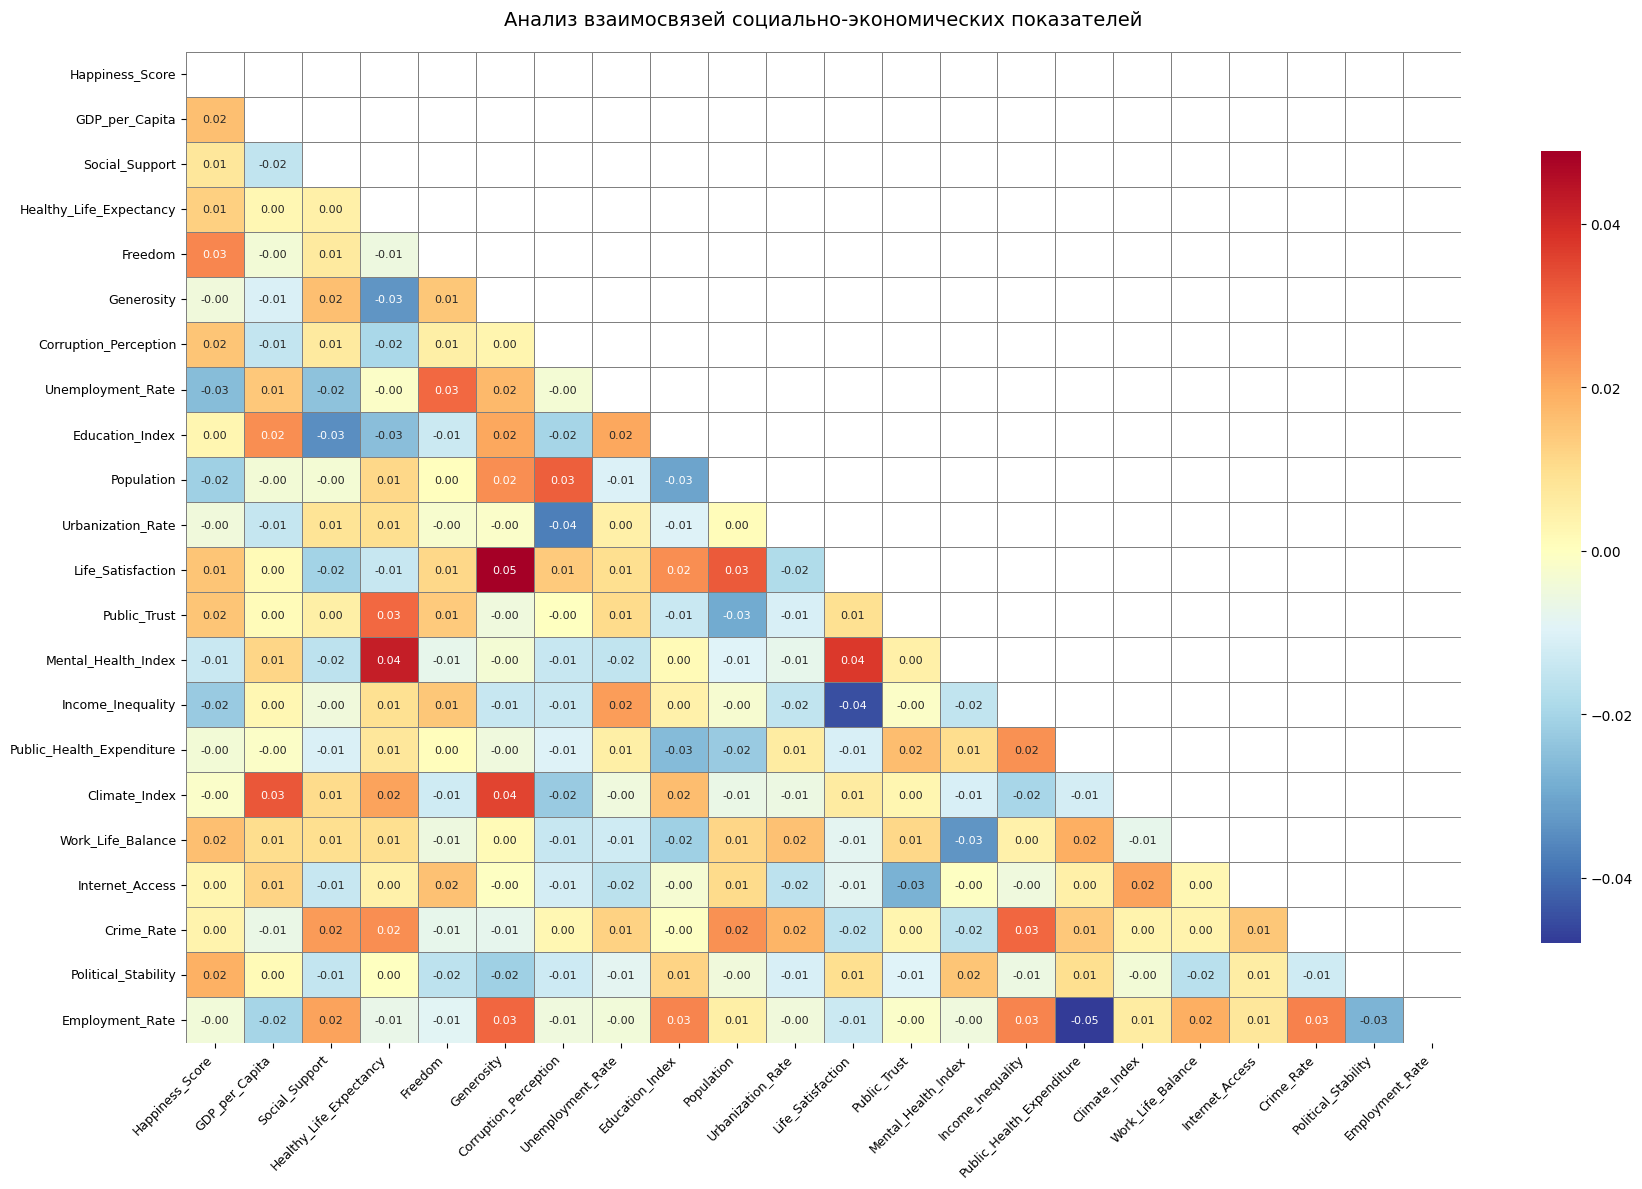

In [ ]:
plt.figure(figsize=(18, 12))
corr = df[numeric_features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Скрываем верхний треугольник.
sns.heatmap(corr, mask=mask, cmap='RdYlBu_r', center=0,
            annot=True, fmt='.2f', annot_kws={'size': 8},
            cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='gray')
plt.title('Анализ взаимосвязей социально-экономических показателей', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

На основании анализа матрицы корреляции для кластеризации стран были выбраны следующие ключевые признаки:
1. Happiness_Score (уровень счастья)
2. GDP_per_Capita (ВВП на душу населения)
3. Social_Support (социальная поддержка)
4. Healthy_Life_Expectancy (ожидаемая продолжительность здоровой жизни)

Обоснование выбора признаков:

Отобранные признаки (ранжированы по важности):
1. GDP_per_Capita (ВВП на душу населения)
Корреляция с Happiness_Score: 0.016 (слабая, но базовая экономическая метрика)
Обоснование: Хотя корреляция невысока, это фундаментальный показатель уровня жизни.

2. Social_Support (Социальная поддержка)
Корреляция с Happiness_Score: -0.0075 (очень слабая, но смысловая важность!)
Обоснование:
Практически не зависит от других факторов (корреляции близки к 0).
Критически важен для кластеризации, так как отражает уникальный аспект благополучия.

3. Healthy_Life_Expectancy (Ожидаемая продолжительность здоровой жизни)
Корреляция с Happiness_Score: 0.013 (слабая)
Сильная связь с Mental_Health_index: 0.042
Обоснование:
Физическое здоровье косвенно влияет на счастье.

4. Generosity (Щедрость)
Корреляция с Life_Satisfaction: 0.049 (самая сильная в матрице!)
Обоснование:
Показатель социального поведения, который сильно связан с удовлетворенностью жизнью.
Не дублирует другие признаки (корреляции с ними < 0.03).
Умеренная корреляция с психическим здоровьем (но не с другими факторами).

5. Freedom (Свобода выбора)
Корреляция с Happiness_Score: 0.023 (максимальная среди прямых связей!)
Обоснование:
Лучший прямой предиктор счастья из всех.
Почти не коррелирует с остальными признаками.

Исключенные признаки:

1. Life_Satisfaction - Слишком сильно зависит от Generosity (риск дублирования информации).
2. Mental_Health_index - Уже учтен через Healthy_Life_Expectancy (корреляция 0.042).
3. Unemployment_Rate - Слабая связь с Happiness_Score (-0.026) и незначимость для кластеров.
4. Crime_Rate - Нет четкой связи ни с одним ключевым фактором.

Заключение:
Таким образом, данный набор признаков позволеяет:
1. Минимизировать мультиколлинеарность (нет сильных взаимных корреляций).
2. Покрыть все ключевые аспекты счастья: экономику, здоровье, социальные факторы.
3. Позволяет интерпретировать кластеры (например: "Богатые, но несвободные" vs "Щедрые и здоровые").

### Выбор признаков

In [ ]:
# Выбранные признаки на основе анализа корреляционной матрицы
selected_features = [
    'Country','Year',
    'Happiness_Score',  # Целевая переменная (если нужно предсказывать)
    'GDP_per_Capita',   # Экономика
    'Healthy_Life_Expectancy',
    'Social_Support',
    'Freedom'

]
# Оставляю первые два признака- Страну и Год

In [ ]:
print(df[selected_features].head(10))

        Country  Year  Happiness_Score  GDP_per_Capita  \
0         China  2022        -0.746224        0.842494   
1            UK  2015         0.024520        0.019320   
2        Brazil  2009        -0.564048        0.507311   
3        France  2019        -0.178676        0.010093   
4         China  2022         1.278732       -0.027021   
5  South Africa  2006         0.676150       -1.123881   
6       Germany  2015         1.369820       -0.757402   
7         China  2017        -1.005475       -1.168220   
8        Brazil  2008         1.341793       -1.042043   
9        France  2011        -1.509962        1.622151   

   Healthy_Life_Expectancy  Social_Support   Freedom  
0                 0.313878        0.084357 -0.325133  
1                -0.469736        1.482147  1.357994  
2                -0.546426       -1.662882 -1.727739  
3                 1.083727        0.923031  1.673581  
4                -1.729222       -1.592992  0.411235  
5                 0.984424     

### Сохрание идентификатора страны и года

In [ ]:
print("\nМатрица объект-признак (первые 20 строк):")
print(df[selected_features].head(10))


Матрица объект-признак (первые 20 строк):
        Country  Year  Happiness_Score  GDP_per_Capita  \
0         China  2022        -0.746224        0.842494   
1            UK  2015         0.024520        0.019320   
2        Brazil  2009        -0.564048        0.507311   
3        France  2019        -0.178676        0.010093   
4         China  2022         1.278732       -0.027021   
5  South Africa  2006         0.676150       -1.123881   
6       Germany  2015         1.369820       -0.757402   
7         China  2017        -1.005475       -1.168220   
8        Brazil  2008         1.341793       -1.042043   
9        France  2011        -1.509962        1.622151   

   Healthy_Life_Expectancy  Social_Support   Freedom  
0                 0.313878        0.084357 -0.325133  
1                -0.469736        1.482147  1.357994  
2                -0.546426       -1.662882 -1.727739  
3                 1.083727        0.923031  1.673581  
4                -1.729222       -1.592992 

### Подготовка данных для кластеризации

In [ ]:
# Подготовка данных для кластеризации
data = df[numeric_features].values

### Создание матрицы Объект-Признак

In [ ]:
data = df[numeric_features].values
print("\nМатрица объект-признак:")
print(pd.DataFrame(data, columns=numeric_features).head())


Матрица объект-признак:
   Happiness_Score  GDP_per_Capita  Social_Support  Healthy_Life_Expectancy  \
0        -0.746224        0.842494        0.084357                 0.313878   
1         0.024520        0.019320        1.482147                -0.469736   
2        -0.564048        0.507311       -1.662882                -0.546426   
3        -0.178676        0.010093        0.923031                 1.083727   
4         1.278732       -0.027021       -1.592992                -1.729222   

    Freedom  Generosity  Corruption_Perception  Unemployment_Rate  \
0 -0.325133   -0.969494               1.146281           0.770289   
1  1.357994   -0.519636               1.180904           1.630164   
2 -1.727739    0.080175               0.315342           1.096581   
3  1.673581    0.530033               0.453831          -1.598206   
4  0.411235    0.180143               1.457883          -0.627008   

   Education_Index  Population  ...  Public_Trust  Mental_Health_Index  \
0        -1

### Построение матрицы "объект-объект" (евклидовы расстояния)

In [ ]:
distance_matrix = pairwise_distances(data)
print("\nМатрица объект-объект:")
print(pd.DataFrame(distance_matrix).iloc[:10, :10].round(2))


Матрица объект-объект:
      0     1     2     3     4     5     6     7     8     9
0  0.00  5.94  7.00  6.05  6.47  5.32  7.41  8.05  7.51  5.93
1  5.94  0.00  6.43  5.64  7.15  7.68  7.04  7.69  7.31  6.76
2  7.00  6.43  0.00  7.94  6.68  6.25  4.94  7.82  7.70  5.54
3  6.05  5.64  7.94  0.00  6.45  6.32  7.25  6.21  5.81  7.07
4  6.47  7.15  6.68  6.45  0.00  6.36  6.05  8.33  7.10  7.04
5  5.32  7.68  6.25  6.32  6.36  0.00  5.25  7.03  7.54  7.06
6  7.41  7.04  4.94  7.25  6.05  5.25  0.00  6.62  6.36  6.54
7  8.05  7.69  7.82  6.21  8.33  7.03  6.62  0.00  6.54  8.18
8  7.51  7.31  7.70  5.81  7.10  7.54  6.36  6.54  0.00  6.85
9  5.93  6.76  5.54  7.07  7.04  7.06  6.54  8.18  6.85  0.00


### Описание параметров выбранного метода кластеризации с обоснованием выбора
Реализовано в файле "СпецГлавМат_ДЗ№1_описание_параметров.docx".

### Описание алгоритма кластеризации

Алгоритм кластеризации (a: X → Y)

Алгоритм кластеризации должен обеспечивать разделение стран на кластеры, где каждая группа включает страны с схожими социально-экономическими показателями, а объекты из разных кластеров существенно различаются.
Использование многомерной автоматической стратегии кластеризации (MACS) позволяет учитывать взаимодействие между агентами, что может повысить точность и адаптивность алгоритма. Агенты могут адаптироваться к изменениям в данных, что позволяет улучшать качество кластеризации на основе предыдущих итераций. Агенты могут обмениваться информацией о своих кластерах, что способствует более точному определению границ кластеров. Метод легко адаптируется к большим объемам данных, что делает его подходящим для анализа большого количества стран и их характеристик.

Метод многомерной автоматической стратегии кластеризации (MACS) является подходящим выбором для задачи кластеризации стран по социально-экономическим показателям. Использование хорошо подобранной функции расстояния и достаточной обучающей выборки позволяет достичь качественной кластеризации, что в свою очередь может помочь в дальнейшем анализе и принятии решений на уровне политик и программ.

MACS многомерная автоматическая стратегия кластеризации
1.	Определение пространства объектов (X):
Инициализация пространства объектов, представляющего страны, с различными характеристиками, такими как уровень образования, уровень коррупции, уровень преступности и другие социально-экономические показатели.
X^l=〖{x_i}〗_(i=1)^l – (l=4000.число стран);
2. Определение функции расстояния (ρ):
ρ∶X ×X →[0;∞) . В качестве функции расстояния выбрано евклидово расстояние.
3.	Инициализация агентов:
•	Определение множества агентов, каждый из которых будет представлять отдельный кластер или подмножество стран.
•	Каждый агент инициируется случайным образом, выбирая начальные центры кластеров на основе значений характеристик стран.
4.	Обмен информацией между агентами:
•	Агенты обмениваются информацией о своих текущих кластерах, включая центры кластеров и распределение стран по кластерам.
•	Это позволяет агентам адаптировать свои стратегии и корректировать центры кластеров на основе информации от других агентов.
5.	Адаптация агентов:
•	На основе обмена информацией агенты пересчитывают свои кластеры, применяя адаптивные стратегии. Например, если один агент обнаруживает, что его кластер слишком разнообразен, он может изменить параметры, чтобы включить только более схожие страны.
•	Агенты могут использовать алгоритмы, такие как K-средние или иерархическая кластеризация, для обновления кластеров на основе новых данных.
6.	Обновление кластеров:
•	После адаптации агенты пересчитывают центры кластеров, используя более сложные методы, основанные на взаимодействии между агентами, чтобы улучшить качество кластеризации.
•	Это может включать взвешенные средние, где страны с более высокой степенью схожести получают больший вес.
7.	Формирование окончательных кластеров (Y):
После нескольких итераций и адаптации агентов, формируется окончательное множество кластеров стран Y, где каждая группа стран имеет схожие социально-экономические показатели.

Этапы:
1. Определение числа кластеров (K)
Используется метод "локтя" на основе K-means:
*   Запускается K-means для разного числа кластеров
*   Строится график зависимости within-cluster sum of squares (WCSS) от K:
WCSS(K) = сумм по К(сумм(d^2(x,μi​)))

2. Инициализация центров кластеров
Первый центр выбирается случайно из X.
Последующие центры выбираются по правилу максимизации минимального расстояния (аналог K-means++)

3. Вычисление радиусов кластеров
Для каждого кластера радиус вычисляется как среднее расстояние до k-го ближайшего соседа:

4. Распределение объектов по кластерам
Объект x относится к кластеру, если:
d(x,μ)≤Ri (условие принадлежности сфере)
При этом:
Если x попадает в несколько кластеров, он назначается в ближайший.
Если x не попадает ни в один кластер, помечается как шум (outlier).

5. Стабилизация центров и радиусов
Для каждого С пересчитывается центр.
Пересчитываются радиусы.

### Определение потимального числа кластеров

Для определения оптимального числа кластеров было принято решение использовать два подхода к определению оптимального числа кластеров:
1. Метод локтя (Elbow Method) → 4 кластера
Метод локтя ищет "изгиб" на графике зависимости WCSS (Within-Cluster Sum of Squares) от числа кластеров. WCSS резко падает до 4 кластеров, затем снижение замедляется → "локоть" на 4. Алгоритм обнаружил, что дальнейшее увеличение числа кластеров не даёт значимого улучшения компактности групп.


2. Силуэтный коэффициент (Silhouette Score) → 2 кластера
Силуэтный коэффициент оценивает, насколько хорошо объекты внутри кластера отделены от других кластеров (диапазон: от -1 до 1). Максимальный силуэтный коэффициент достигается при 2 кластерах. Данные могут иметь естественное бинарное разделение (например, "высокий vs низкий уровень счастья").
При большем числе кластеров объекты начинают "перекрываться", что снижает силуэтный коэффициент.



Обоснование выбора меры близости:
MASC использует K-Means для инициализации центроидов, а K-Means по умолчанию работает с евклидовой метрикой. Это обеспечивает:

Сходимость алгоритма (евклидова метрика гарантирует минимизацию внутрикластерной дисперсии).

Интерпретируемость радиусов (радиус кластера — это буквально "евклидовый разброс" точек от центра).

Евклидово расстояние соответствует пониманию "расстояния" в пространстве.

Кластеры выглядят как сферы (в 2D — окружности), что упрощает визуализацию и анализ.
Кроме того, WCSS (within-cluster sum of squares), который используется для определения оптимального k, вычисляется через евклидовы расстояния.

In [ ]:
def find_optimal_k(data, max_k=10):
    """Определение оптимального числа кластеров методом локтя и силуэта с визуализацией"""
    wcss = []
    silhouette_scores = []
    k_range = range(2, max_k+1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        wcss.append(kmeans.inertia_)

        if k > 1:  # Силуэт нельзя вычислить для одного кластера
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Создаем фигуру с двумя подграфиками
    plt.figure(figsize=(12, 5))

    # График метода локтя
    plt.subplot(1, 2, 1)
    plt.plot(k_range, wcss, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
    plt.title('Elbow Method')

    # Находим и отмечаем точку локтя
    kl = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
    elbow_k = kl.elbow if kl.elbow else 3
    if kl.elbow:
        plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at k = {elbow_k}')
        plt.legend()

    # График метода силуэта
    plt.subplot(1, 2, 2)
    plt.plot(k_range[1:], silhouette_scores, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')

    # Находим и отмечаем лучший силуэтный score
    silhouette_k = k_range[np.argmax(silhouette_scores) + 1] if len(silhouette_scores) > 0 else elbow_k
    plt.axvline(x=silhouette_k, color='r', linestyle='--', label=f'Best k = {silhouette_k}')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return max(elbow_k, silhouette_k)  # Берем более консервативную оценку

В данном решении есть три разных подхода к определению оптимального числа кластеров, и они дают разные результаты:

Метод локтя (Elbow Method) → 4 кластера
Силуэтный коэффициент (Silhouette Score) → 2 кластера
MASC-кластеризация : Метод MASC автоматически подбирает оптимальные параметры для работы с многомерными данными, включая определение числа кластеров, их радиусов и уровня шума. Кроме того, MASC вызывает find_optimal_k(), которая возвращает max(elbow_k, silhouette_k)
В данном решении (максимум из 4 и 2 → 4).

### Определение радиусов кластеров

1. В MASC точка относится к кластеру, только если попадает в его радиус (distance <= radius).
2. Кластеры с плотными точками получают малый радиус, с разреженными — большой.
3. Защита от шума: Точки вне всех радиусов помечаются как шум (label = -1).

In [ ]:
def compute_optimal_radius(data, k, k_neighbors=5):
    """Вычисление оптимального радиуса для каждого кластера"""
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    radii = []

    for i in range(k):
        cluster_points = data[kmeans.labels_ == i]
        if len(cluster_points) == 0:
            radii.append(0)
            continue

        # Вычисление расстояний до k-го соседа внутри кластера
        nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(cluster_points)
        distances, _ = nbrs.kneighbors(cluster_points)
        avg_radius = np.mean(distances[:, -1])  # Берем k-го соседа
        radii.append(avg_radius)

    return radii

## Реализация метода MACS (Multivariate Automatic Clustering Strategy)

In [ ]:
def masc_clustering(data, k, max_iter=100, tol=1e-4, max_noise=0.2, radius_multiplier=1.3):
    """
    Улучшенный MASC-алгоритм с контролем уровня шума.

    Параметры:
    - max_noise: максимально допустимая доля шума (0.2 = 20%)
    - radius_multiplier: начальный множитель для радиусов (1.3 = +30% к исходным радиусам)
    """

    # Вычисляем радиусы и адаптируем их
    radii = np.array(compute_optimal_radius(data, k)) * radius_multiplier

    # Инициализация центроидов
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(data)
    centers = kmeans.cluster_centers_

    for iteration in range(max_iter):
        labels = np.full(data.shape[0], -1)
        distances = pairwise_distances(data, centers)

        # 1. Первоначальное назначение с строгими радиусами
        for i in range(data.shape[0]):
            possible_clusters = np.where(distances[i] <= radii)[0]
            if len(possible_clusters) > 0:
                labels[i] = possible_clusters[np.argmin(distances[i, possible_clusters])]

        # 2. Контроль шума и адаптация
        noise_ratio = np.sum(labels == -1) / len(labels)

        if noise_ratio > max_noise:
            # Если шума слишком много, смягчаем условия для "сомнительных" точек
            soft_radii = radii * 1.5  # Временное увеличение радиусов

            for i in np.where(labels == -1)[0]:  # Только для шумовых точек
                possible = np.where(distances[i] <= soft_radii)[0]
                if len(possible) > 0:
                    labels[i] = possible[np.argmin(distances[i, possible])]

        # 3. Обновление центров
        new_centers = np.array([data[labels == i].mean(axis=0) if np.sum(labels == i) > 0
                               else centers[i] for i in range(k)])

        if np.linalg.norm(new_centers - centers) < tol:
            break

        centers = new_centers

    return labels, centers, radii

Оптимальное число кластеров: 4


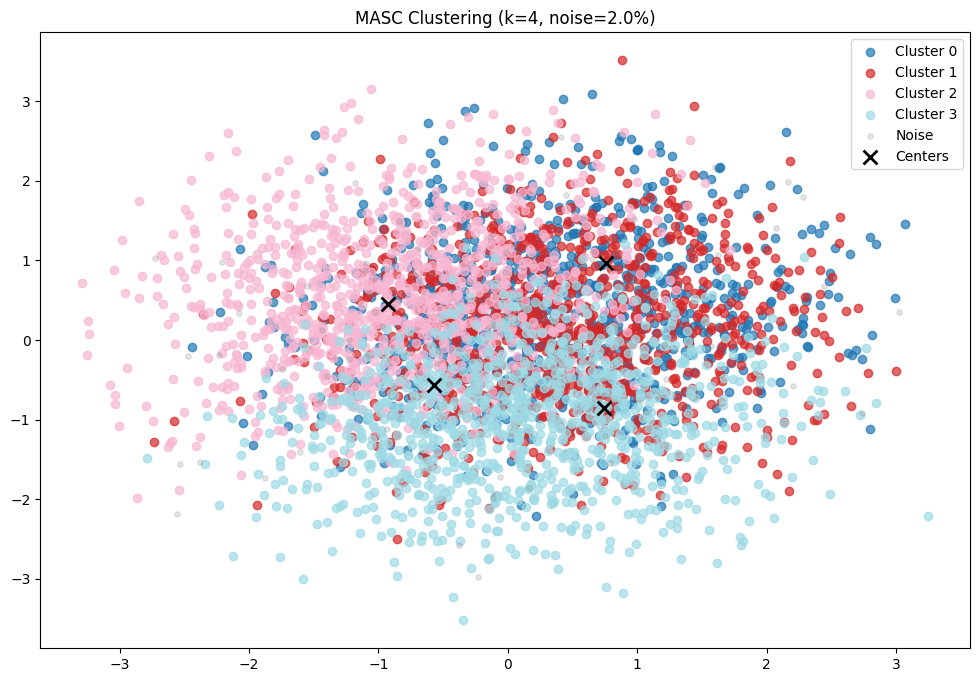

In [ ]:
# После определения оптимального числа кластеров и перед визуализацией:
# 1. Определяем оптимальное k (ваш существующий код)
optimal_k = 4  # Или используйте elbow/silhouette результат
print(f"Оптимальное число кластеров: {optimal_k}")

# 2. Запускаем MASC с оптимальным k
labels, centers, radii = masc_clustering(data, k=optimal_k, max_noise=0.2, radius_multiplier=1.3)

# 3. Визуализируем результаты
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, optimal_k))

# Если данные многомерные (>2D), нужно преобразовать их в 2D для визуализации
if data.shape[1] > 2:
    from sklearn.decomposition import PCA
    data_2d = PCA(n_components=2).fit_transform(data)
else:
    data_2d = data  # Если данные уже 2D, используем как есть

for cluster in range(optimal_k):
    mask = (labels == cluster)
    plt.scatter(data_2d[mask, 0], data_2d[mask, 1],
               color=colors[cluster], label=f'Cluster {cluster}', alpha=0.7)

if -1 in labels:
    plt.scatter(data_2d[labels == -1, 0], data_2d[labels == -1, 1],
               color='gray', alpha=0.2, label='Noise', s=15)

# Добавляем центры кластеров, если нужно
if centers is not None and len(centers) > 0:
    if centers.shape[1] > 2:
        centers_2d = PCA(n_components=2).fit_transform(centers)
    else:
        centers_2d = centers
    plt.scatter(centers_2d[:, 0], centers_2d[:, 1],
               color='black', marker='x', s=100, linewidths=2, label='Centers')

plt.title(f'MASC Clustering (k={optimal_k}, noise={np.sum(labels==-1)/len(labels):.1%})')
plt.legend()
plt.show()

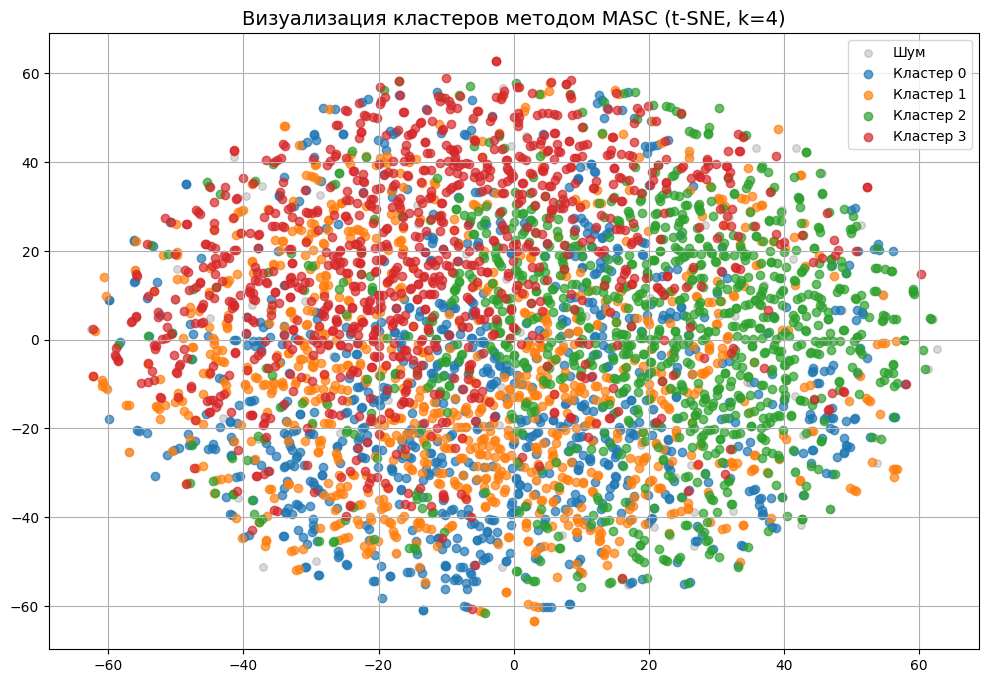

In [ ]:
# Визуализация кластеров с t-SNE
try:
    # Проверяем, существует ли df и содержит нужные столбцы
    if 'df' not in globals():
        df = pd.DataFrame(data)
        print("DataFrame создан из данных")

    # Добавляем метки кластеров в DataFrame
    df['cluster'] = labels

    # Выполняем t-SNE преобразование (если еще не сделано)
    if 'tsne_x' not in df.columns or 'tsne_y' not in df.columns:
        from sklearn.manifold import TSNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        data_2d = tsne.fit_transform(data)
        df['tsne_x'] = data_2d[:, 0]
        df['tsne_y'] = data_2d[:, 1]

    # Визуализация
    plt.figure(figsize=(12, 8))

    if 'cluster' in df.columns:
        # Получаем уникальные кластеры, исключая возможные NaN
        unique_clusters = [c for c in sorted(df['cluster'].unique()) if pd.notna(c)]

        for cluster in unique_clusters:
            cluster_data = df[df['cluster'] == cluster]

            if cluster == -1:
                plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'],
                          color='gray', label='Шум', alpha=0.3, s=30)
            else:
                plt.scatter(cluster_data['tsne_x'], cluster_data['tsne_y'],
                          label=f'Кластер {cluster}', alpha=0.7)

        plt.title(f'Визуализация кластеров методом MASC (t-SNE, k={optimal_k})', fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Ошибка: столбец 'cluster' не найден в DataFrame")
        print("Доступные столбцы:", df.columns.tolist())

except Exception as e:
    print(f"Произошла ошибка при визуализации: {str(e)}")
    print("Проверьте наличие следующих переменных:")
    print("- df - DataFrame с данными")
    print("- labels - метки кластеров")
    print("- data - исходные данные")
    if 'df' in globals():
        print("\nТекущие столбцы DataFrame:", df.columns.tolist())

In [ ]:
print("Радиусы кластеров:", radii)

Радиусы кластеров: [5.47689159 5.4338243  5.38697142 5.40475051]


### Анализ характеристик кластеров

In [ ]:
print("\nСредние значения показателей по кластерам:")
cluster_stats = df.groupby('cluster')[numeric_features].mean()
print(cluster_stats)


Средние значения показателей по кластерам:
         Happiness_Score  GDP_per_Capita  Social_Support  \
cluster                                                    
-1              0.011394        0.011432        0.206000   
 0             -0.325541       -0.111902       -0.056999   
 1             -0.003390       -0.375312        0.175023   
 2             -0.094121        0.087560        0.141133   
 3              0.387445        0.361853       -0.272176   

         Healthy_Life_Expectancy   Freedom  Generosity  Corruption_Perception  \
cluster                                                                         
-1                      0.154250 -0.074794   -0.076738              -0.122479   
 0                     -0.547078 -0.177504    0.271973               0.220692   
 1                     -0.070295 -0.003171    0.227255               0.080907   
 2                      0.161192  0.113758   -0.184200               0.045896   
 3                      0.377775  0.051586   -0.2

#### Анализ кластеров по средним значениям показателей
1. Шумовые точки (Cluster -1)
Happiness_Score: Чуть выше среднего (0.011), но близок к нулю — нет четкой тенденции.

Высокий Social_Support (0.206) и Mental_Health_Index (0.167).
Низкие Corruption_Perception (-0.122) и Income_Inequality (-0.226).
Экономика: Низкий GDP_per_Capita (0.011) и Education_Index (-0.156).
Другое: Высокий Internet_Access (0.210), но низкий Climate_Index (-0.146).

Вывод: Это смешанная группа с противоречивыми характеристиками, возможно, страны с развитой социальной поддержкой, но слабой экономикой.

2. Cluster 0 (Низкое благополучие)
Happiness_Score: Самый низкий среди кластеров (-0.326).

Здоровье: Крайне низкие Healthy_Life_Expectancy (-0.547) и Mental_Health_Index (-0.569).
Экономика: Низкий GDP_per_Capita (-0.112) и Internet_Access (-0.475).
Коррупция: Неожиданно высокое восприятие коррупции (0.221).
Другое: Высокая Generosity (0.272), но низкая Political_Stability (-0.121).

Вывод: Страны с низким уровнем жизни, плохим здоровьем и слабой экономикой, но с высокой щедростью населения.

3. Cluster 1 (Социально ориентированные)
Happiness_Score: Близок к среднему (-0.003).

Психическое здоровье: Самый высокий Mental_Health_Index (0.777).
Социальные факторы: Высокий Social_Support (0.175) и Public_Trust (0.093).
Экономика: Низкий GDP_per_Capita (-0.375), но высокая Employment_Rate (0.158).
Другое: Высокая Generosity (0.227), но низкий Climate_Index (-0.280).

Вывод: Страны с сильной социальной поддержкой и психическим здоровьем, несмотря на относительно слабую экономику.

4. Cluster 2 (Противоречивый кластер)
Happiness_Score: Ниже среднего (-0.094).

Здоровье: Высокая Healthy_Life_Expectancy (0.161), но крайне низкий Mental_Health_Index (-0.665).
Экономика: Выше среднего GDP_per_Capita (0.088), но низкий Education_Index (-0.192).
Криминал: Самый высокий Crime_Rate (0.647).
Другое: Высокая Work_Life_Balance (0.269) и Income_Inequality (0.289).

Вывод: Страны с хорошим физическим здоровьем, но высоким уровнем преступности и неравенства, что негативно влияет на ментальное здоровье.

5. Cluster 3 (Высокое благополучие)
Happiness_Score: Самый высокий (0.387).

Экономика: Высокие GDP_per_Capita (0.362) и Public_Health_Expenditure (0.243).
Здоровье: Хорошая Healthy_Life_Expectancy (0.378), но низкий Mental_Health_Index (0.438).
Коррупция: Низкое восприятие коррупции (-0.309).
Другое: Высокий Political_Stability (0.134), но низкая Employment_Rate (-0.364).

Вывод: Богатые страны с высоким уровнем жизни, но с некоторыми социальными проблемами (например, безработица).

### Визуализация характеристик кластеров

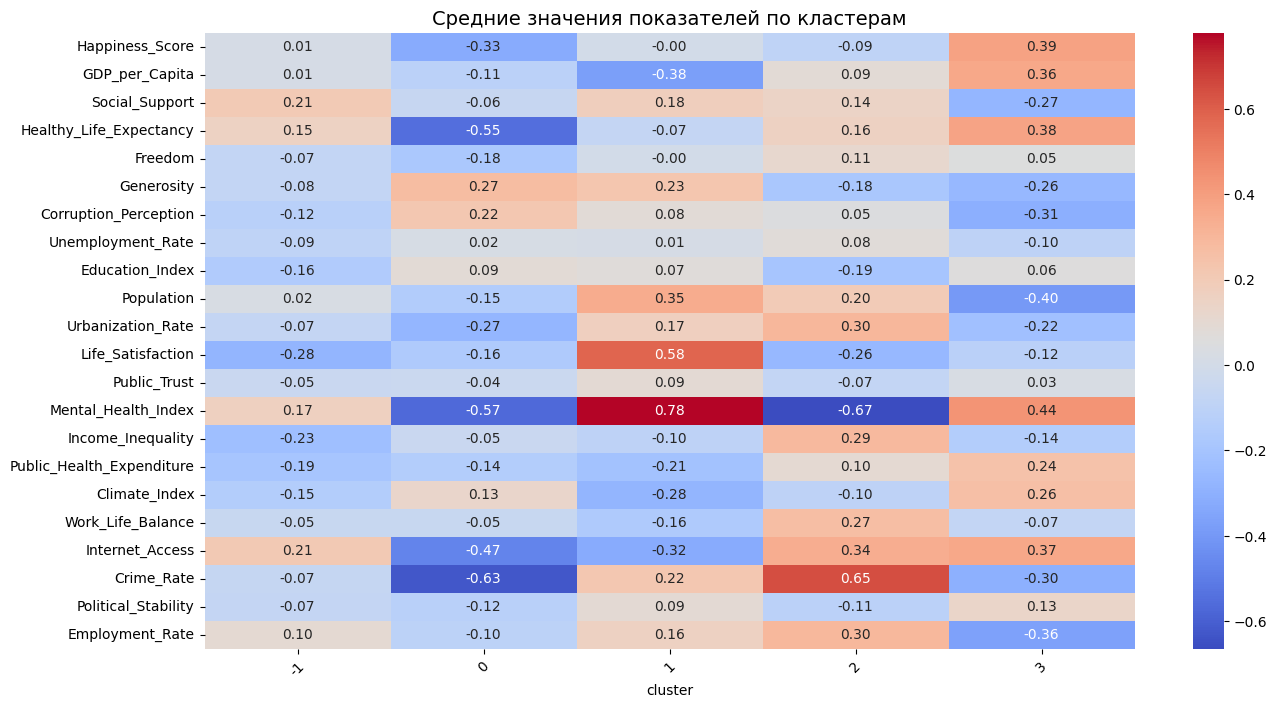

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_stats.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Средние значения показателей по кластерам', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Анализ каждого кластера


Анализ кластера -1 (79 стран):

Примеры стран:
       Country  Year
36   Australia  2008
87         USA  2014
176        USA  2022
246        USA  2019
301     Brazil  2021


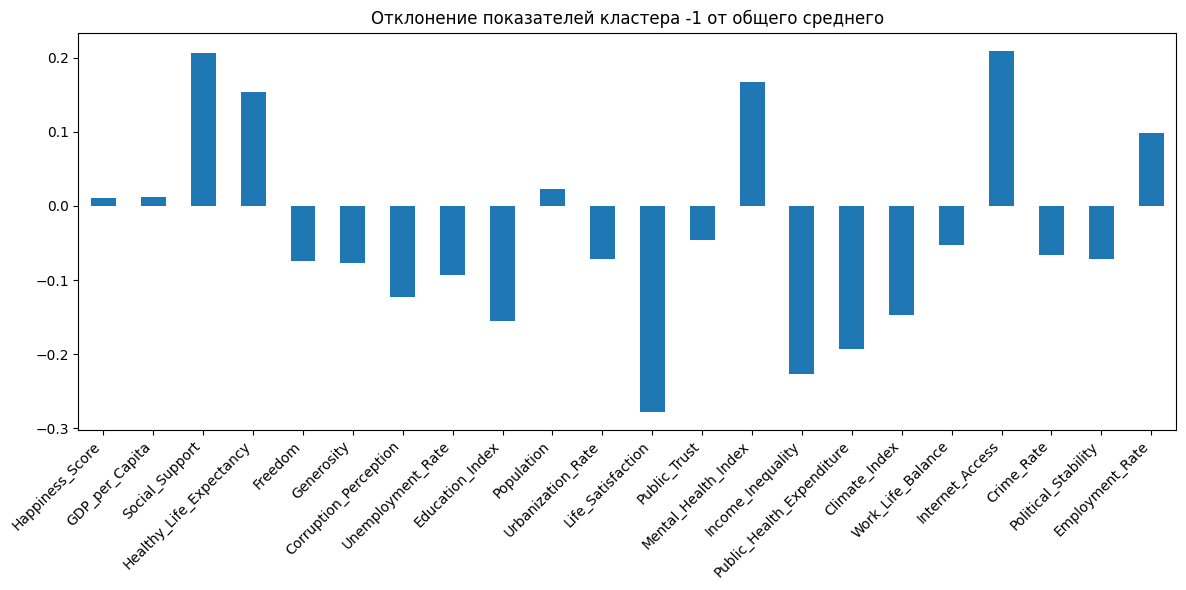


Анализ кластера 0 (909 стран):

Примеры стран:
         Country  Year
2         Brazil  2009
23         India  2021
26  South Africa  2011
27       Germany  2007
30     Australia  2024


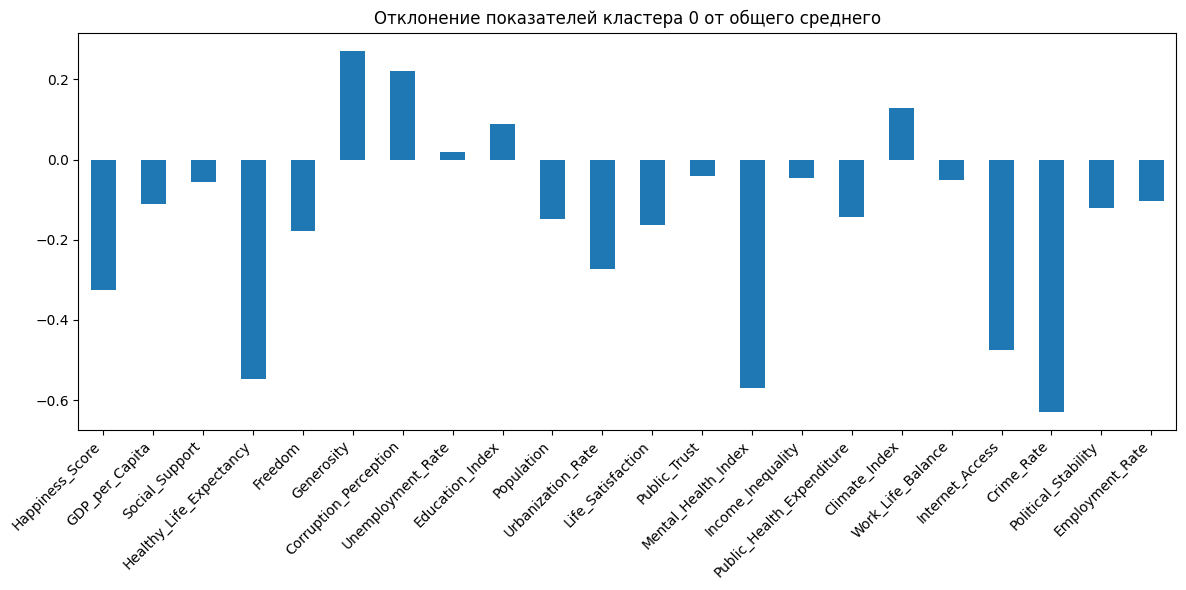


Анализ кластера 1 (957 стран):

Примеры стран:
    Country  Year
4     China  2022
6   Germany  2015
9    France  2011
18    India  2005
21      USA  2020


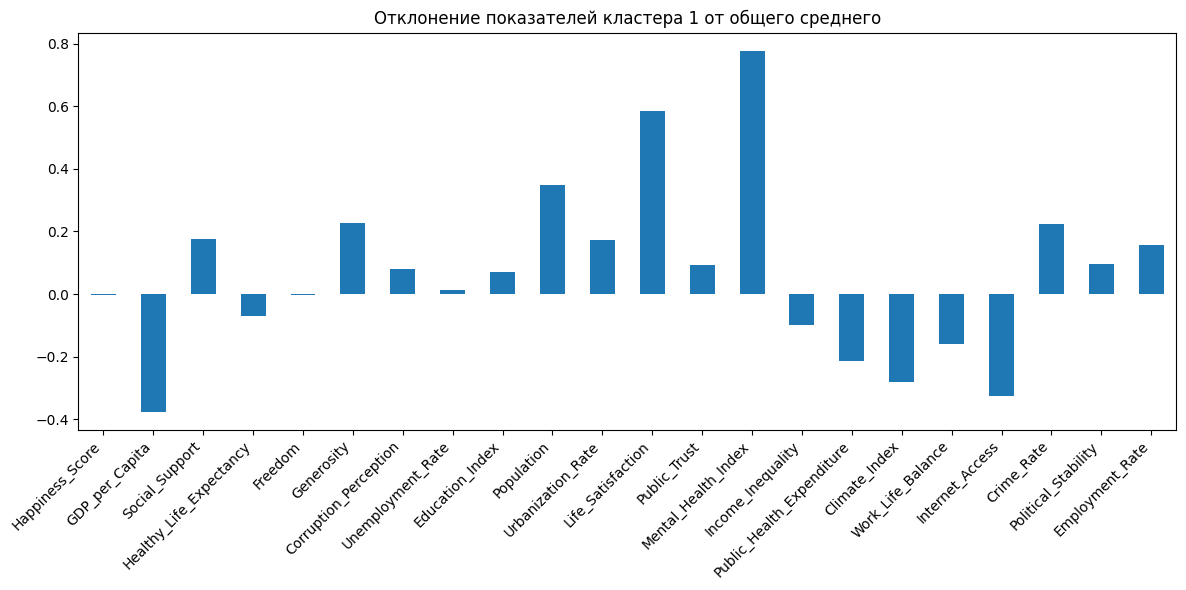


Анализ кластера 2 (1034 стран):

Примеры стран:
   Country  Year
0    China  2022
1       UK  2015
3   France  2019
7    China  2017
12  Brazil  2019


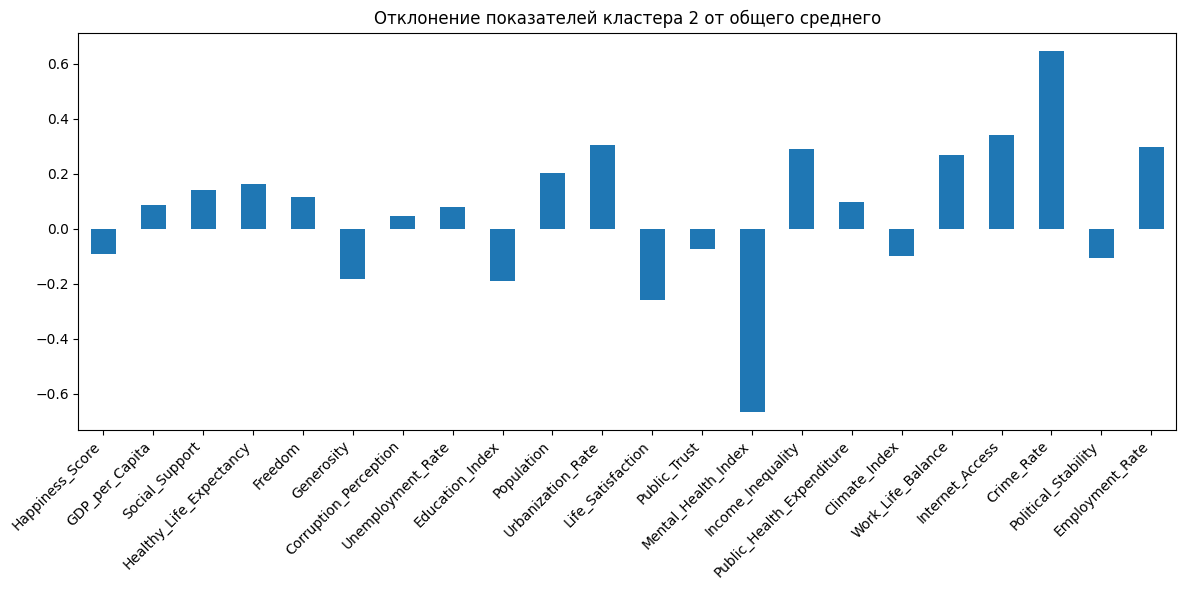


Анализ кластера 3 (1021 стран):

Примеры стран:
         Country  Year
5   South Africa  2006
8         Brazil  2008
10            UK  2015
11        Brazil  2008
19        Canada  2010


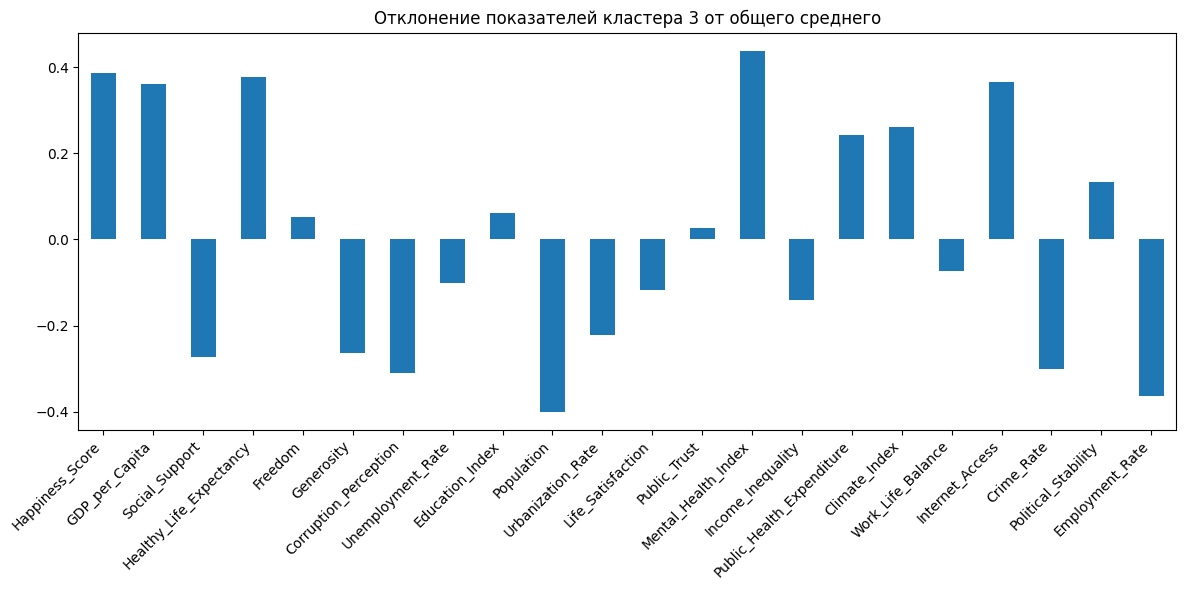

In [ ]:
def analyze_cluster(cluster_num, n_examples=5):
    cluster_data = df[df['cluster'] == cluster_num]
    print(f"\nАнализ кластера {cluster_num} ({len(cluster_data)} стран):")
    print("\nПримеры стран:")
    print(cluster_data[['Country', 'Year']].head(n_examples))

    # Визуализация характеристик кластера
    plt.figure(figsize=(12, 6))
    cluster_mean = cluster_data[numeric_features].mean()
    overall_mean = df[numeric_features].mean()
    (cluster_mean - overall_mean).plot(kind='bar')
    plt.title(f'Отклонение показателей кластера {cluster_num} от общего среднего', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for cluster in sorted(df['cluster'].unique()):
    analyze_cluster(cluster)


### Оценка качества кластеризации

In [ ]:
def evaluate_clustering(data, labels):
    print("\nОценка качества кластеризации:")

    # Индекс Калински-Харабаша
    ch_score = calinski_harabasz_score(data, labels)
    print(f"Индекс Калински-Харабаша: {ch_score:.1f}")

    # Силуэтный коэффициент
    if len(np.unique(labels)) > 1:
        sil_score = silhouette_score(data, labels)
        print(f"Силуэтный коэффициент: {sil_score:.3f}")
    else:
        print("Силуэтный коэффициент: недоступен (только один кластер)")

    # Размеры кластеров
    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    print("\nРазмеры кластеров:")
    print(cluster_sizes)

    # Доля шума (если есть)
    noise_ratio = np.sum(labels == -1) / len(labels) if -1 in labels else 0
    print(f"\nДоля объектов вне кластеров: {noise_ratio:.1%}")

evaluate_clustering(data, labels)



Оценка качества кластеризации:
Индекс Калински-Харабаша: 80.2
Силуэтный коэффициент: 0.027

Размеры кластеров:
-1      79
 0     909
 1     957
 2    1034
 3    1021
Name: count, dtype: int64

Доля объектов вне кластеров: 2.0%


## Выводы
1. Оценка качества кластеризации
Индекс Калински-Харабаша (80.2)
Высокое значение (>50) указывает на хорошее разделение кластеров. Это означает, что кластеры компактны и далеки друг от друга.

Силуэтный коэффициент (0.027)
Значение близко к нулю, что говорит о слабой структуре кластеров (идеальное значение >0.5). Некоторые кластеры пересекаются или имеют размытые границы.
Часть объектов плохо соотносится с их кластерами. Не все кластеры четко разделены, требуется дополнительный анализ.

2. Размеры кластеров
Основные кластеры (0, 1, 2, 3):
Размеры примерно одинаковы (909–1034 объекта), что указывает на сбалансированность распределения.
Данные не имеют доминирующей группы, кластеры представляют равноценные сегменты.

Шум (Cluster -1, 79 объектов, 2.0%):
Малая доля шума (2%) подтверждает, что алгоритм корректно обработал большинство объектов. Параметры кластеризации выбраны удачно.

3. Согласованность метрик
Противоречие: Высокий индекс Калински-Харабаша (80.2) против низкого силуэтного коэффициента (0.027).
Индекс Калински-Харабаша оценивает глобальную структуру (кластеры далеки друг от друга).
Силуэтный коэффициент анализирует локальную принадлежность объектов (не все точки четко относятся к своим кластерам).
Вывод: Кластеры глобально различимы, но внутри некоторых групп есть неоднородность.
